In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('netflix_titles.csv')

# Exploring the Dataset

In [98]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [99]:
df.shape

(8807, 12)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Data Cleaning

In [101]:
# The ID and description is not useful for analysis so we drop it.
df.drop(columns=['description', 'show_id'], inplace=True)

In [102]:
print(df.isnull().sum())

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64


In [105]:
# Replacing null director values with "Not Given"
df["director"].fillna("Not Given",inplace=True)

In [108]:
# Replacing null countries values with "Not Given"
df["country"].fillna("Not Given",inplace=True)

In [111]:
# Replacing null cast values with "Not Given"
df["cast"].fillna("Not Given",inplace=True)

In [112]:
print(df.isnull().sum())

type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
dtype: int64


In [113]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [114]:
print(df.duplicated().sum())

0


In [115]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


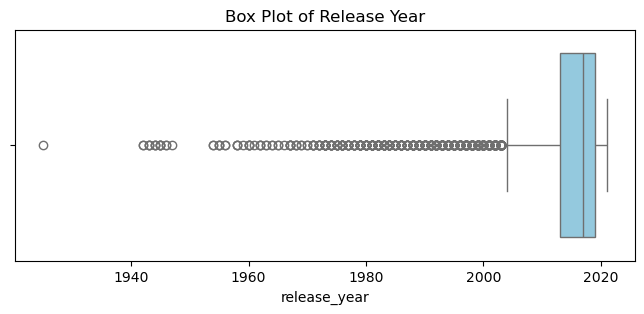

In [120]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df["release_year"], color='skyblue')
plt.title("Box Plot of Release Year")
plt.xlabel("release_year")
plt.show()

In [126]:
# We need to remove outliers
# We use IQR technique

Q1 = df["release_year"].quantile(0.25)
Q3 = df["release_year"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["release_year"] >= lower_bound) & (df["release_year"] <= upper_bound)]

In [127]:
df.describe()

,release_year
count,8088.000000
mean,2016.305514
std,3.786044
min,2004.000000
25%,2015.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


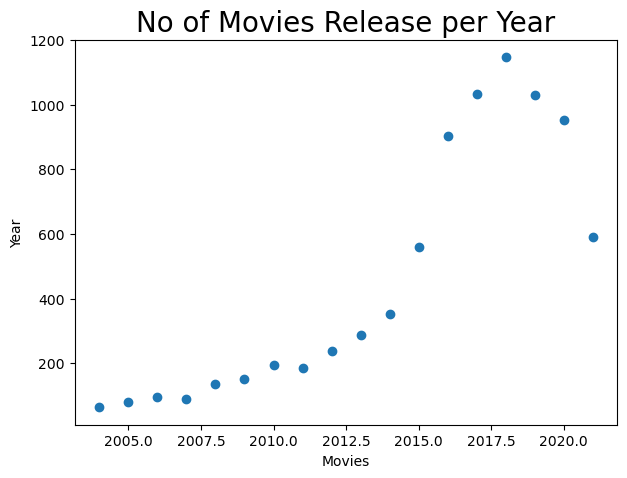

In [131]:
movies_year_df = (df['release_year'].value_counts()).reset_index()
y = movies_year_df['count']
x = movies_year_df['release_year']

plt.figure(figsize=(7,5))
plt.scatter(x,y)
plt.title('No of Movies Release per Year',fontsize=20, fontweight=10)
plt.xlabel('Movies')
plt.ylabel('Year');

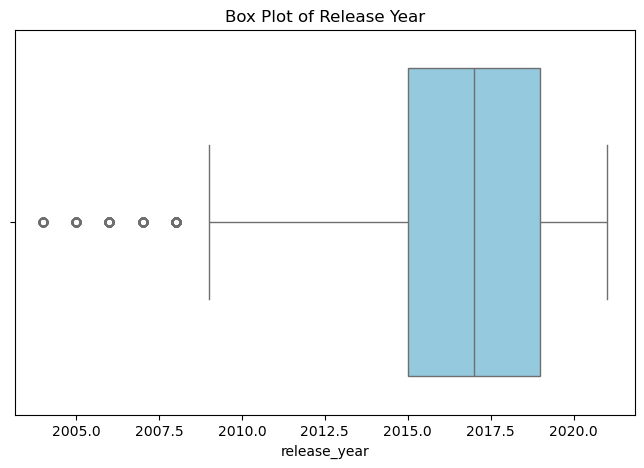

In [132]:
# Box plot of release_year after removing outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df["release_year"], color='skyblue')
plt.title("Box Plot of Release Year")
plt.xlabel("release_year")
plt.show()

In [146]:
# Splitting the genres into a list format
df['listed_in'] = df['listed_in'].str.split(',')

In [147]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Given,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries]
1,TV Show,Blood & Water,Not Given,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Given,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ..."
3,TV Show,Jailbirds New Orleans,Not Given,Not Given,Not Given,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]"
4,TV Show,Kota Factory,Not Given,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ..."


# Exploratory Data Analysis

## Univariate Analysis

### Movies vs TV Shows

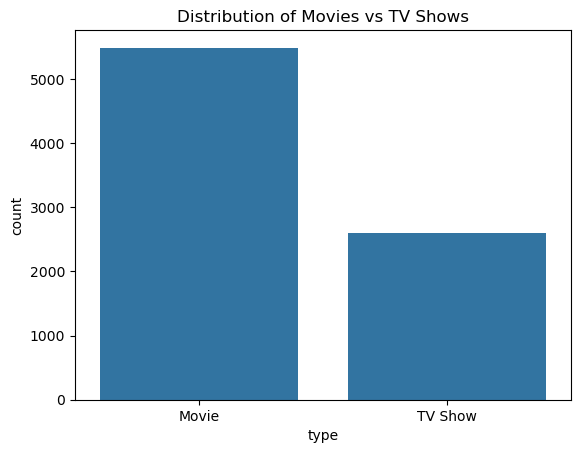

In [133]:
sns.countplot(data=df, x='type')
plt.title('Distribution of Movies vs TV Shows')
plt.show()

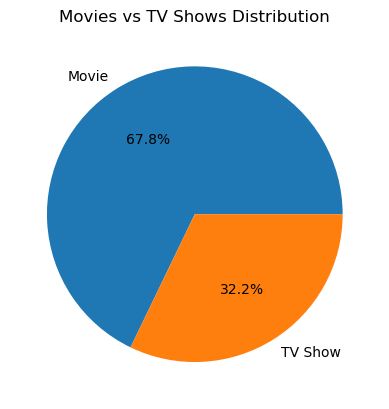

In [134]:
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Movies vs TV Shows Distribution')
plt.show()

### Movie Duration

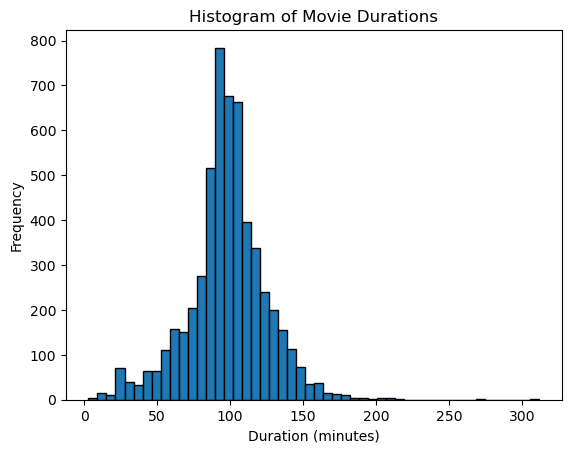

In [151]:
movie_duration = np.array(df[df['type'] == 'Movie']['duration'].str.replace(' min','')).astype(np.float16)
plt.hist(movie_duration, bins=50, edgecolor='black')
plt.title('Histogram of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

### Top 10 Directors

In [144]:
director_counts = df['director'].value_counts().reset_index().head(11)
director_counts = director_counts[director_counts['director'] != 'Not Given']
director_counts.columns = ['Director', 'Count']
director_counts

,Director,Count
1,Rajiv Chilaka,19
2,"Raúl Campos, Jan Suter",18
3,Marcus Raboy,16
4,Suhas Kadav,16
5,Jay Karas,14
6,Cathy Garcia-Molina,13
7,Jay Chapman,12
8,Don Michael Paul,10
9,Fernando Ayllón,8
10,Lance Bangs,8


### Top 5 Countries

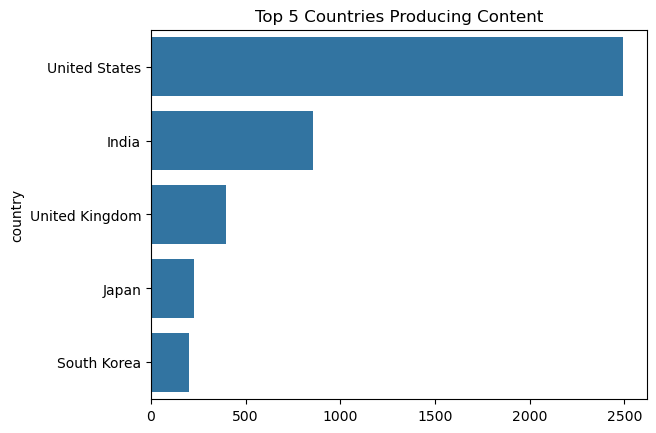

In [155]:
top_countries = df[df['country'] != 'Not Given']['country'].value_counts().head(5)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 5 Countries Producing Content')
plt.show()

### Rating Distribution

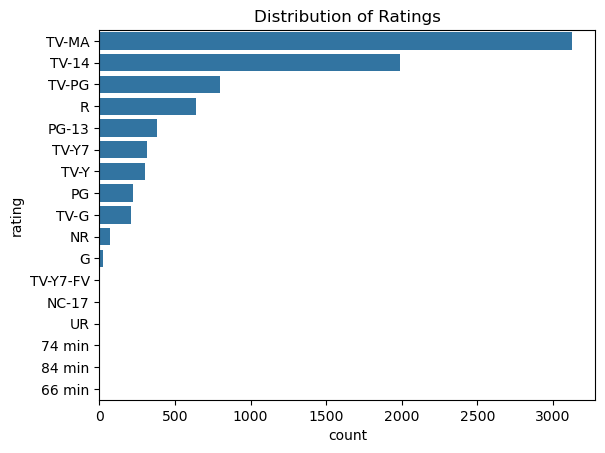

In [156]:
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.show()

### Content Trends over time

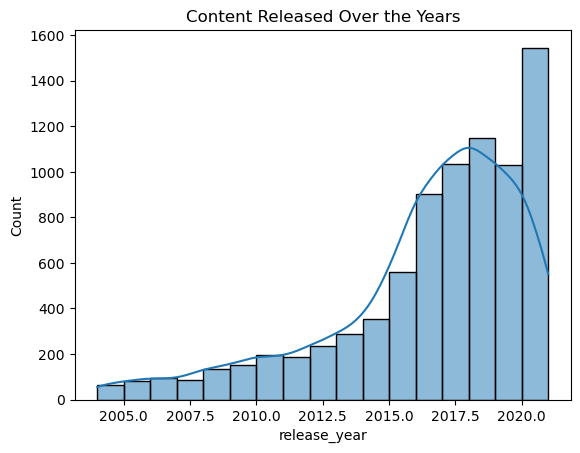

In [164]:
sns.histplot(df['release_year'], bins=17, kde=True)
plt.title('Content Released Over the Years')
plt.show()

### Distribution of TV Show seasons

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Shorya\AppData\Local\Temp\ipykernel_16232\632360604.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_shows['duration'] = df_shows['duration'].str.extract('(\d+)').astype(int)


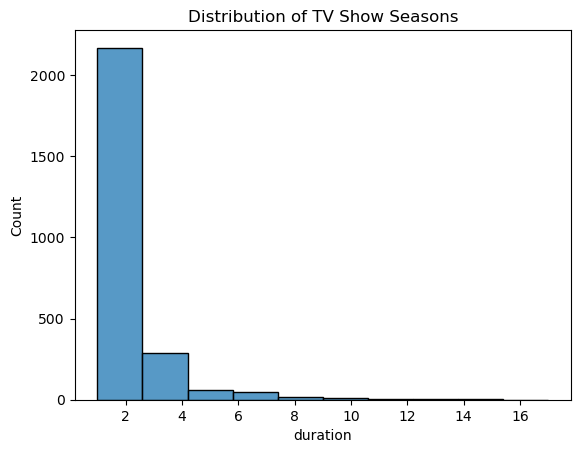

In [174]:
df_shows = df[df['type'] == 'TV Show'].copy()
df_shows['duration'] = df_shows['duration'].str.extract('(\d+)').astype(int)
sns.histplot(df_shows['duration'], kde=False, bins=10)
plt.title('Distribution of TV Show Seasons')
plt.show()

### Top 10 Cast Members

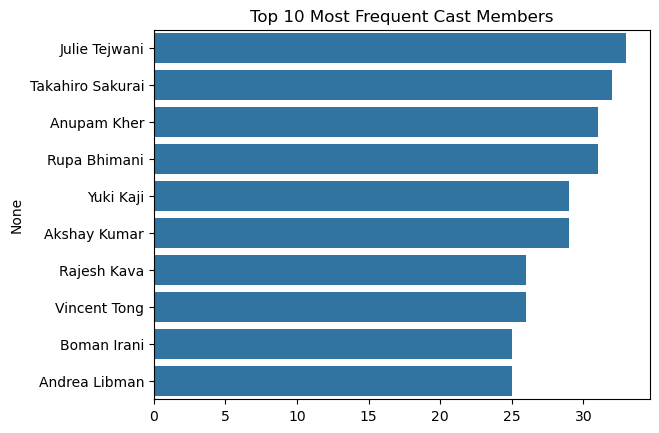

In [175]:
all_cast = ', '.join(df[df['cast'] != 'Not Given']['cast'])

cast_list = all_cast.split(', ')

cast_series = pd.Series(cast_list)

top_cast = cast_series.value_counts().head(10)

sns.barplot(x=top_cast.values, y=top_cast.index)
plt.title('Top 10 Most Frequent Cast Members')
plt.show()

## Bivariate/Multivariate Analysis

### Movies vs TV Shows Over the Years

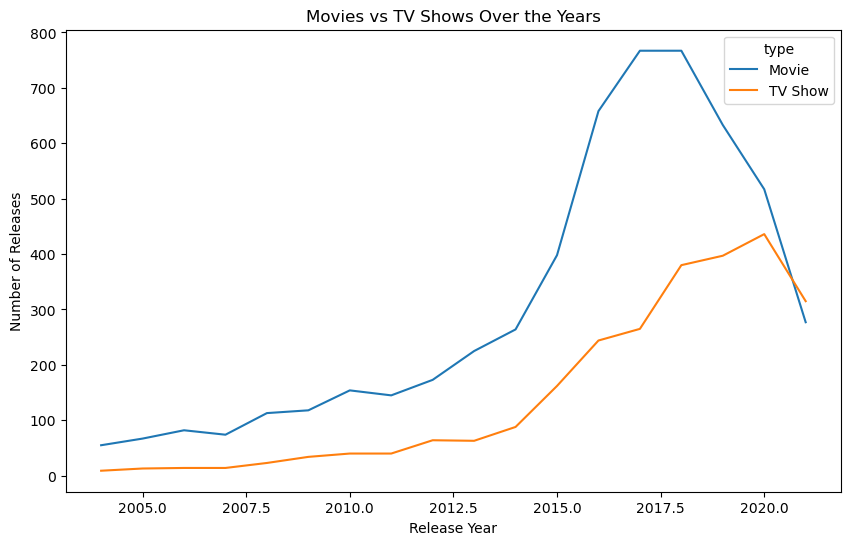

In [177]:
type_year = df.groupby(['release_year', 'type']).size().unstack()

type_year.plot(kind='line', figsize=(10, 6))
plt.title('Movies vs TV Shows Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.show()

### Content Added by Month

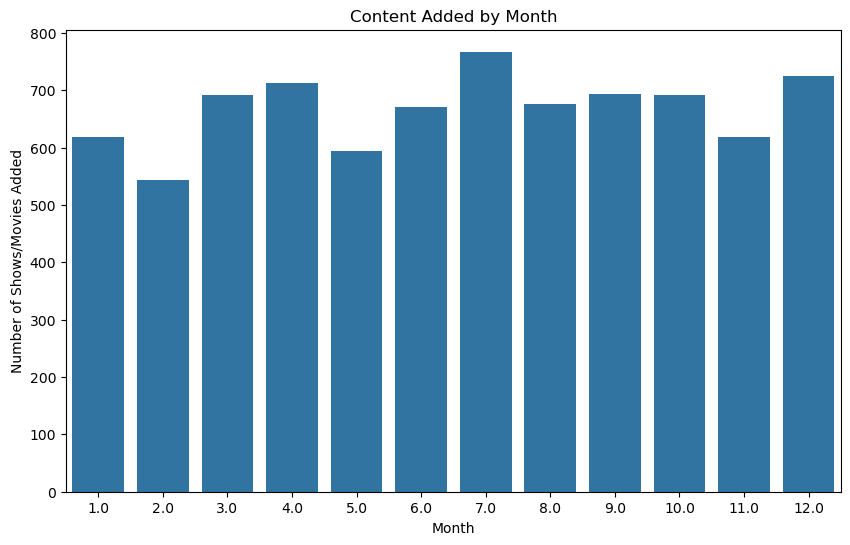

In [178]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

content_by_month = df['month_added'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=content_by_month.index, y=content_by_month.values)
plt.title('Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Shows/Movies Added')
plt.show()

### Relationship Between Release Year and Content Type

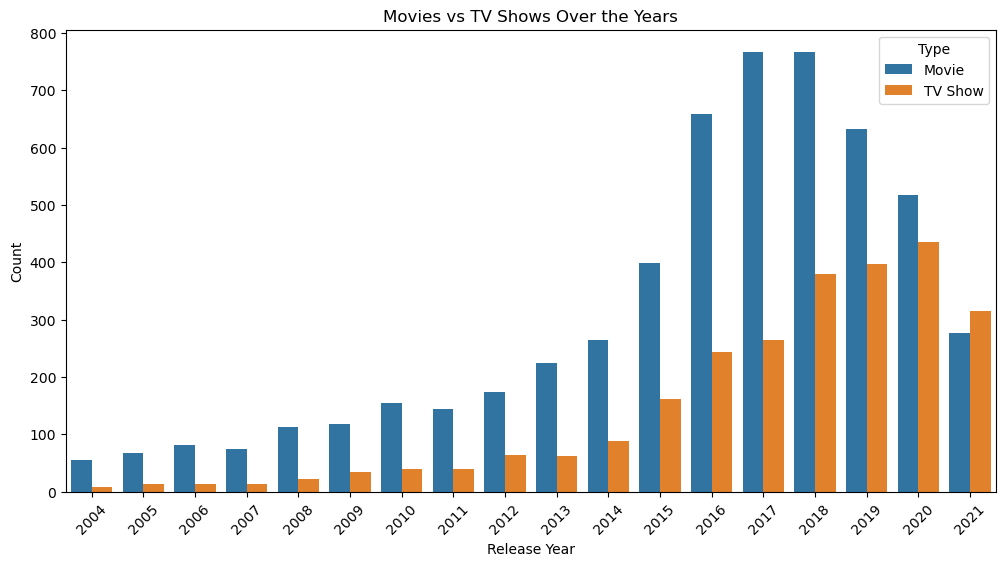

In [179]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='release_year', hue='type', order=sorted(df['release_year'].unique()))
plt.title("Movies vs TV Shows Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.show()


### Rating vs Type of Content

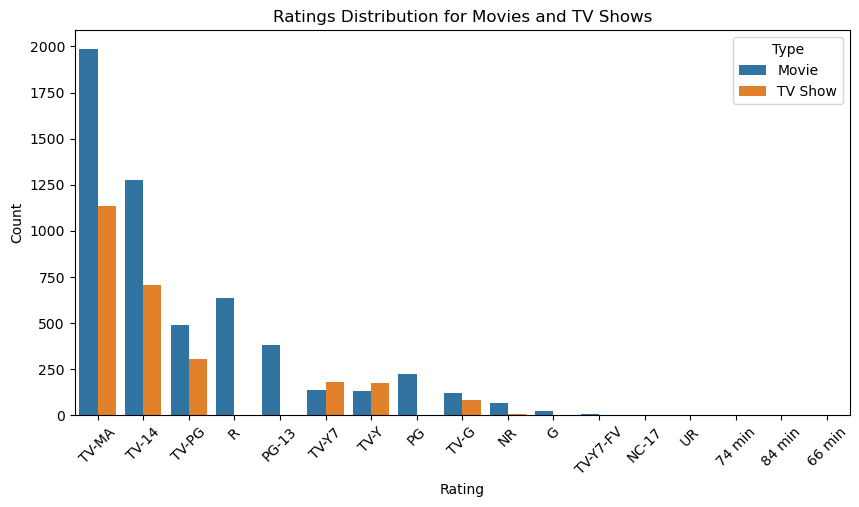

In [184]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index)
plt.title("Ratings Distribution for Movies and TV Shows")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.show()


### Country vs Type of Content

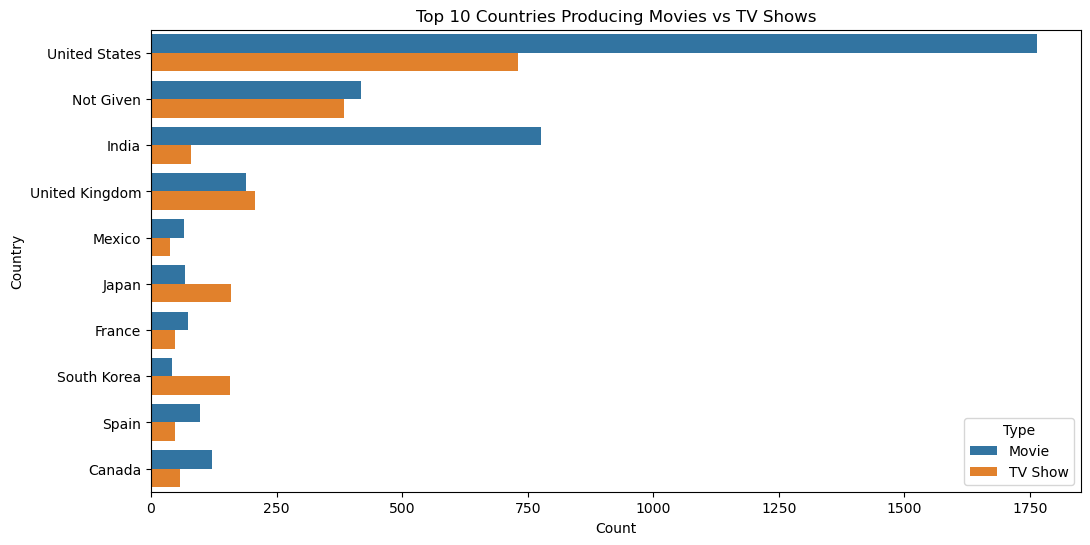

In [185]:
plt.figure(figsize=(12,6))
top_countries = df['country'].value_counts().index[:10]
sns.countplot(data=df[df['country'].isin(top_countries)], y='country', hue='type')
plt.title("Top 10 Countries Producing Movies vs TV Shows")
plt.xlabel("Count")
plt.ylabel("Country")
plt.legend(title="Type")
plt.show()


### Genre vs. Type of Content

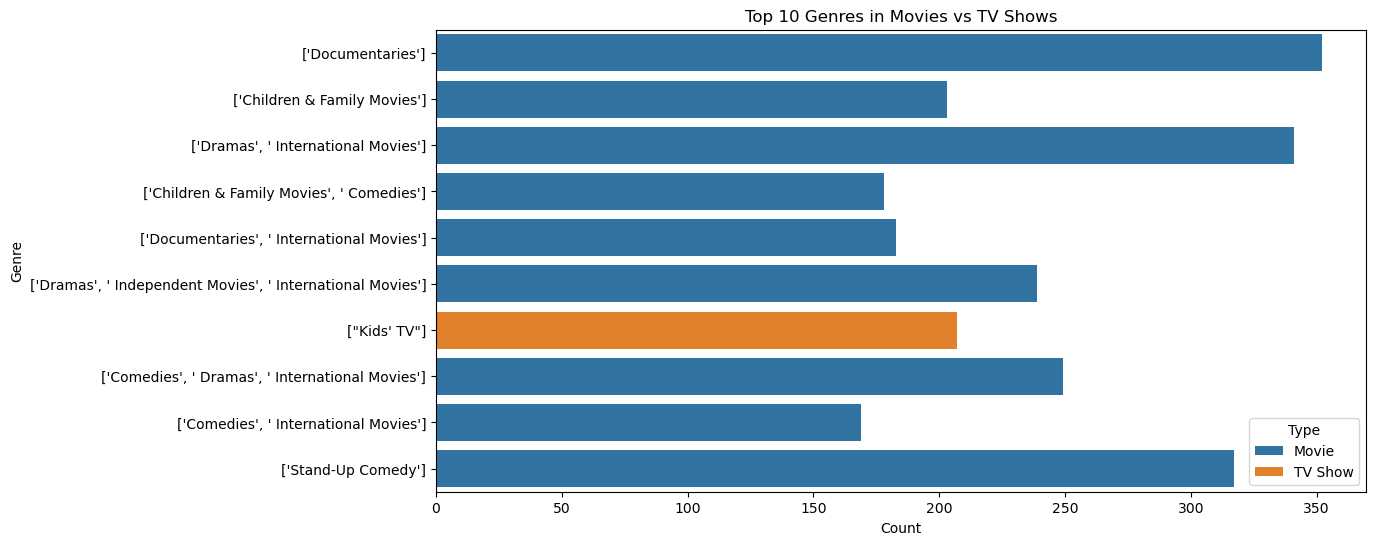

In [190]:
df['listed_in'] = df['listed_in'].astype(str)
plt.figure(figsize=(12,6))
top_genres = df['listed_in'].value_counts().index[:10]
sns.countplot(data=df[df['listed_in'].isin(top_genres)], y='listed_in', hue='type')
plt.title("Top 10 Genres in Movies vs TV Shows")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.legend(title="Type")
plt.show()
